In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# read the data
raw_data = pd.read_csv("International students Time management data.csv")

# transform y - variable 
raw_data = raw_data.fillna(raw_data.mode().iloc[0])
y_column = raw_data[['7','10', '11', '12', '14', '17']]
raw_data['avg_response'] = y_column.mode(axis = 1)[0]
# raw_data = raw_data[raw_data['avg_response'] != 'Neither'] 
raw_data['label'] = (raw_data['avg_response'] == 'Agree') | (raw_data['avg_response'] == 'Strong Agree')

# Building blocks for pipeline
impute_and_one_hot = Pipeline([
    ('impute', SimpleImputer(strategy= 'most_frequent')),
    ('encode', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

impute_and_ordinal = Pipeline([
    ('impute', SimpleImputer(strategy= 'most_frequent')),
    ('ordinal', OrdinalEncoder()),
    ('scalar', MinMaxScaler(feature_range = (0,1)))
])

categorical_prepr = ColumnTransformer([
    ("impute_and_one_hot", impute_and_one_hot, ['Course']),
    ("impute_and_ordinal", impute_and_ordinal, ['Academic', 'Attendance'])
])

# create pipeline model
pipe = Pipeline([
    ('features', categorical_prepr),
    ('classifier', LogisticRegression())
])

X_train, X_test, Y_train, Y_test = train_test_split(raw_data, raw_data['label'], random_state = 1)

# fit the pipeline to the training data
pipe.fit(X_train, Y_train)

# predict target values on training data
pred_train = pipe.predict(X_train)

# validate with X
pred_test = pipe.predict(X_test)
score = pipe.score(X_test, Y_test)

print('\n',confusion_matrix(Y_test, pred_test))
print('\n',classification_report(Y_test, pred_test))


 [[16  4]
 [ 6  6]]

               precision    recall  f1-score   support

       False       0.73      0.80      0.76        20
        True       0.60      0.50      0.55        12

    accuracy                           0.69        32
   macro avg       0.66      0.65      0.65        32
weighted avg       0.68      0.69      0.68        32



In [26]:
ordinal_encoder = OrdinalEncoder(categories=[['<40%', '40%~49%', '50%~59%', '60%~70%','>70%']])
ordinal_encoder.fit(raw_data['Academic'].values.reshape(-1, 1))
ordinal_encoder.categories_

[array(['<40%', '40%~49%', '50%~59%', '60%~70%', '>70%'], dtype=object)]

In [27]:
ordinal_encoder = OrdinalEncoder([['S4', 'S3', 'S2', 'S1', 'S0']])
ordinal_encoder.fit(raw_data['Attendance'].values.reshape(-1, 1))
ordinal_encoder.categories_

[array(['S4', 'S3', 'S2', 'S1', 'S0'], dtype=object)]

In [30]:
# Set grid search params
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,Y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

c:\users\nchau\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\nchau\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'Disagree'

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\nchau\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will

c:\users\nchau\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'Disagree'

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\nchau\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'Disagree'

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\nchau\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

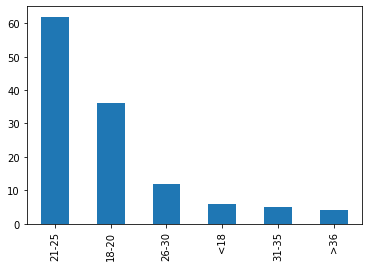

In [19]:
# import the seaborn libaray
import matplotlib as plt
raw_data['Age'].value_counts().plot(kind='bar')

In [20]:
train_data = pd.concat([X_train.reset_index(), pd.Series(pred_train, name="pred")], axis=1)

train_data['TP'] = (train_data['label'] == True) & (train_data['pred'] == True)
train_data['TN'] = (train_data['label'] == False) & (train_data['pred'] == False)
train_data['FN'] = (train_data['label'] == True) & (train_data['pred'] == False)
train_data['FP'] = (train_data['label'] == False) & (train_data['pred'] == True)

In [21]:
train_data['Course'].value_counts()

Business                          56
Social Sciences and Humanities    11
Law/Legal studies                 10
Art and Design                     6
Science and engineering            4
Computing                          3
Media and Communications           3
Name: Course, dtype: int64

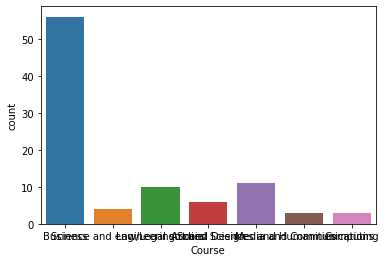

In [22]:
import seaborn as sns
sns.countplot(x="Course", data=train_data)

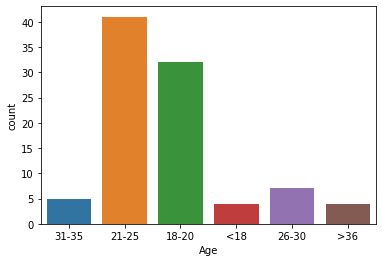

In [23]:
sns.countplot(x="Age", data=train_data)